In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import librosa
import plotly.graph_objects as go
from IPython.display import Audio
import plotly.express 
from audio2numpy import open_audio
from librosa import display
%matplotlib notebook

In [9]:
fp = "FA18.wav"

signal, sampling_rate = librosa.load(fp, sr = None)
N=len(signal)
duration=len(signal)/sampling_rate
print(duration,"seconds")
print(sampling_rate)
dt=1/sampling_rate
t=np.linspace(0,len(signal)*dt,len(signal))
freq=np.linspace(0,sampling_rate,len(signal))
Audio(fp)

9.09061224489796 seconds
44100


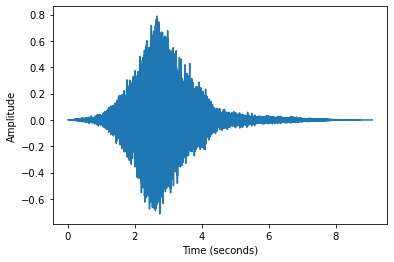

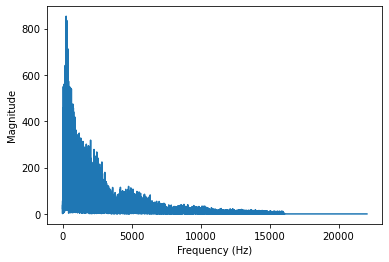

In [10]:
plt.figure()
#librosa.display.waveplot(y=signal,sr=sampling_rate)
plt.plot(t,signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

plt.figure()
f=np.fft.fft(signal)
plt.plot(freq[:len(signal)//2],np.abs(f[:len(signal)//2]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

In [12]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None, eps = 1e-14, vals_out='abs'):
    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)
    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])
    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    # Compute spectrogram feature
    specgram = 2/N * np.abs(fft)
    z_title = "Amplitude"
    
    return specgram, freqs, z_title

def make_spectrogram(samples, f_samp, z_axis='abs'):
    spectrum, freqs, z_title = spectrogram(samples, f_samp, stride_ms = 10.0, window_ms = 20.0, max_freq = None, eps = 1e-14, vals_out=z_axis)
    fig = go.Figure(data=[go.Surface(z=spectrum, y=freqs, colorscale = 'spectral')])
    fig.update_layout(
                title="3D Spectrogram", title_x=.5    
            )
    fig.update_layout(scene = dict(
                        xaxis_title='Time',
                        yaxis_title='Frequency/Hz',
                        zaxis_title=z_title),
                        width=700,
                        margin=dict(r=20, b=10, l=10, t=10))
    fig.show()

In [2]:
make_spectrogram(signal, sampling_rate, z_axis='abs')

NameError: name 'make_spectrogram' is not defined

0.001002004008016032 998.0000000000001


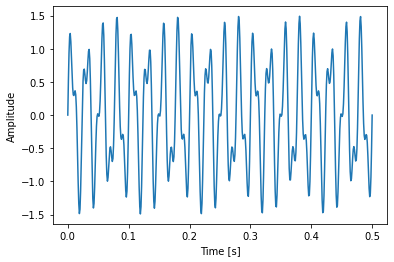

In [2]:
N=500
T=.5
t = np.linspace(0, T, N)
dt=t[1]-t[0]
Fs=1/dt
freq = np.linspace(0, 1 / dt, N)
print(dt,Fs)
f1,f2=40,90
s = np.sin(f1 * 2 * np.pi * t) + 0.5 * np.sin(f2 * 2 * np.pi * t)
plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

<IPython.core.display.Javascript object>


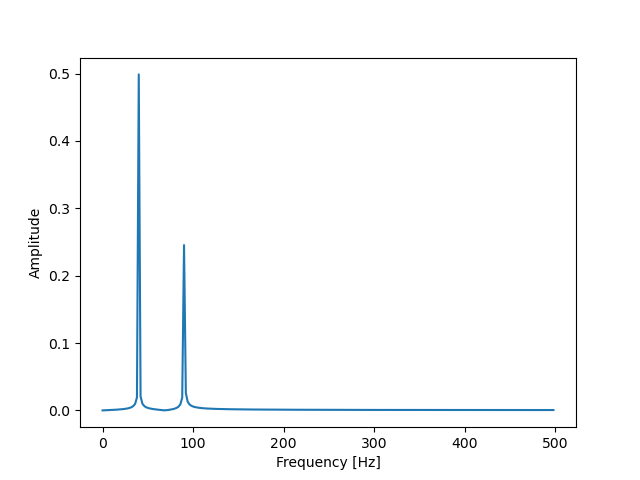

In [7]:
f = np.fft.fft(s)
plt.figure()
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.plot(freq[:N//2],np.abs(f)[:N//2]*1/N)
plt.show()